# 2019 DSC AWS Learning Group
### Titanic: Machine Learning from Disaster
### https://www.kaggle.com/c/titanic

### Load Libraries

In [1]:
# Pandas is the most popular library for data manipulation and analysis
import pandas as pd

# Numpy is a powerful library for doing mathematical operations
import numpy as np

# Matplotlib is a plotting library
from matplotlib import pyplot as plt
import seaborn as sns

# This magic (%) command enables charts created by matplotlib can be shown in the jupyter notebook
%matplotlib inline 
plt.style.use('fivethirtyeight')
import warnings ## importing warnings library.
warnings.filterwarnings('ignore') ## Ignore warning

### Exploratory Data Analysis

In [2]:
# Import the datasets
train = pd.read_csv('https://raw.githubusercontent.com/DataScienceClub777/DSC/master/titanic_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/DataScienceClub777/DSC/master/titanic_test.csv')

In [3]:
# Inspect the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Inspect the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Let's dig a little deeper
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# What are some summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# How many missing values are there?
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

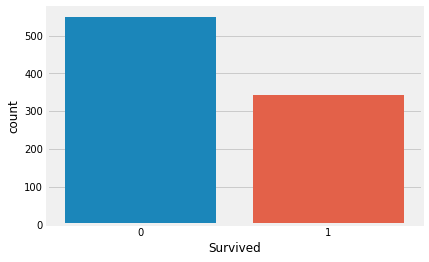

In [8]:
# Is our dataset balanced?
sns.countplot('Survived',data=train)
plt.show()

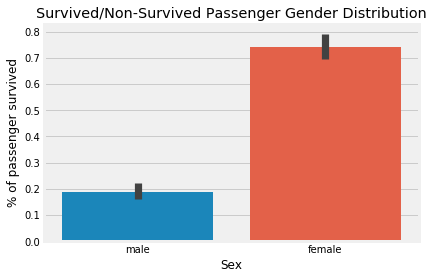

In [9]:
# Let's examine the survival rate by gender
sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train)
plt.title("Survived/Non-Survived Passenger Gender Distribution")
plt.ylabel("% of passenger survived")
plt.xlabel("Sex");

Text(0.5,1,'Survived/Non-Survived Passenger Gender Distribution')

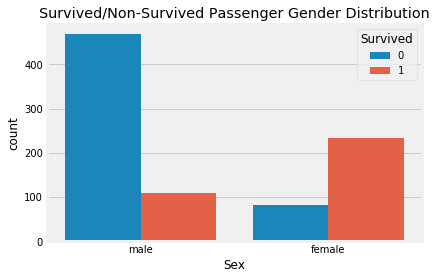

In [10]:
# More detail on survival rate by gender
sns.countplot(x = "Sex", hue="Survived", data = train, linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution")


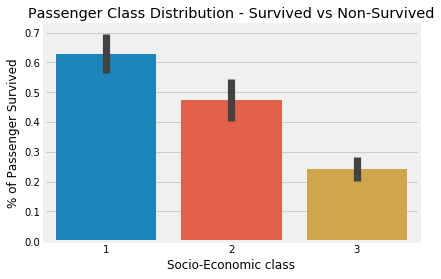

In [11]:
# What about survival rate by socio-economic class?
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived")
plt.xlabel("Socio-Economic class");
plt.ylabel("% of Passenger Survived");
labels = ['Upper', 'Middle', 'Lower']

Text(0.5,1,'Survived/Non-Survived Embarkation Distribution')

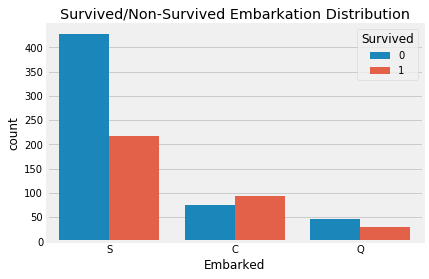

In [12]:
# How about survival rate based on where passengers embarked?
sns.countplot(x = "Embarked", hue="Survived", data = train, linewidth=2)
plt.title("Survived/Non-Survived Embarkation Distribution")

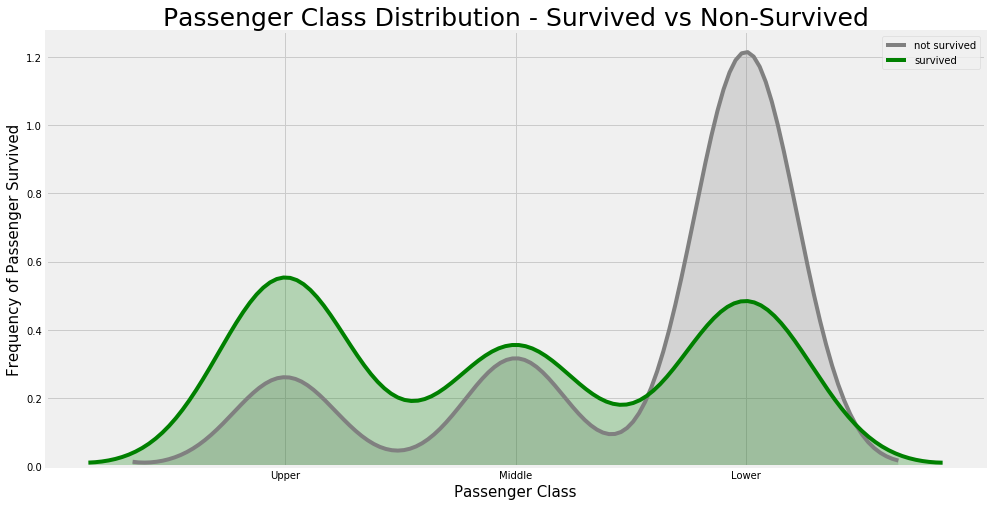

In [13]:
# Let's create a kernal density plot to further examine survival rate by socio economic class
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)

# Convert xticks into words
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

Text(0.5,0,'Passenger Age')

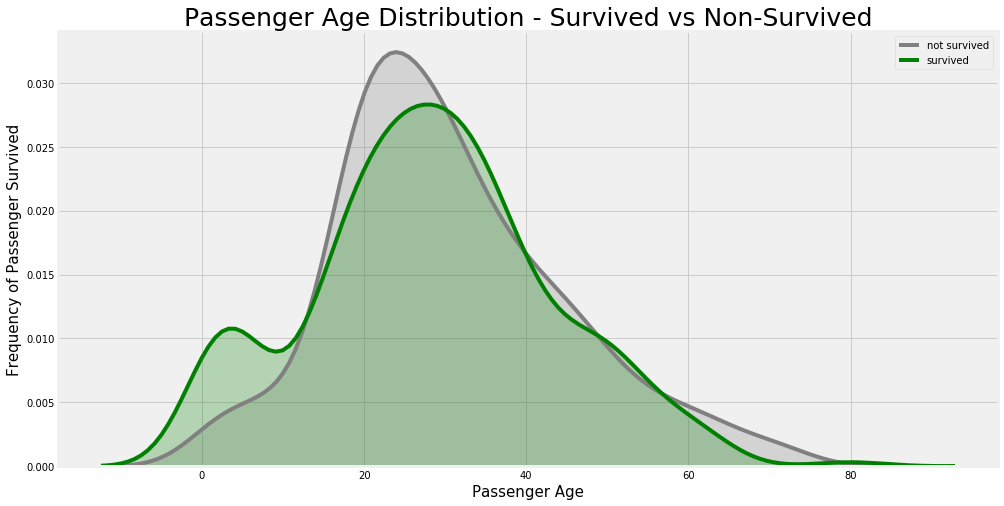

In [14]:
# Let's create a kernal density plot to examine survival rate by age
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.Age[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Age Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Age", fontsize = 15)

### Feature Engineering Preview
let's add a feature that splits between children and adults since we see a clear relationship between age and survival rate

In [16]:
# Create a column Child and assign to 'NaN'
train['Child'] = float('NaN')

# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column
train['Child'][train['Fare'] > 18] = 1
train['Child'][train['Fare'] < 18] = 0
print(train["Child"].head())

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Child, dtype: float64


In [17]:
# Print the Survival Rates for passengers under 18
print(train["Survived"][train["Child"] == 1].value_counts(normalize = True))

1    0.537275
0    0.462725
Name: Survived, dtype: float64


In [18]:
# Print the Survival Rates for passengers 18 or older
print(train["Survived"][train["Child"] == 0].value_counts(normalize = True))

0    0.733467
1    0.266533
Name: Survived, dtype: float64


Text(0.5,1,'Survived/Non-Survived Passenger Ag Distribution')

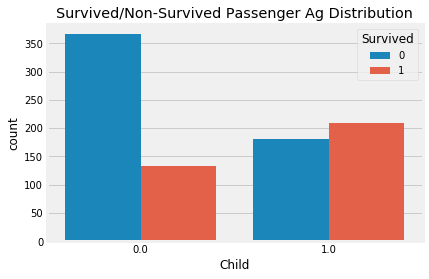

In [19]:
# Let's visualize survival rate for children and adults
sns.countplot(x = "Child", hue="Survived", data = train, linewidth=2)
plt.title("Survived/Non-Survived Passenger Age Distribution")

### Cleaning the data

In [21]:
# Let's get a reminder for the missing values in our dataset
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
print(pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent']))

             Total  Percent
Cabin          687    77.10
Age            177    19.87
Child            3     0.34
Embarked         2     0.22
Fare             0     0.00
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
Survived         0     0.00
PassengerId      0     0.00


In [23]:
# Let's check on the test set
total = test.isnull().sum().sort_values(ascending = False)
percent = round(test.isnull().sum().sort_values(ascending = False)/len(test)*100, 2)
print(pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent']))

             Total  Percent
Cabin          327    78.23
Age             86    20.57
Fare             1     0.24
Embarked         0     0.00
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
PassengerId      0     0.00


In [24]:
# We see that both our training and test set have similar missing values
# Let's make an effort to fill these missing values

# In our training set there are 2 missing values for Embarked
percent = pd.DataFrame(round(train.Embarked.value_counts(dropna=False, normalize=True)*100,2))
total = pd.DataFrame(train.Embarked.value_counts(dropna=False))

total.columns = ["Total"]
percent.columns = ['Percent']
print(pd.concat([total, percent], axis = 1))



     Total  Percent
S      644    72.28
C      168    18.86
Q       77     8.64
NaN      2     0.22


In [25]:
# We could impute the Embarked variable using the most common class of embarkation which is "S" 
# using the commented line of code below
# train['Embarked'] = train['Embarked'].fillna('S')

# Or we could dig a little deeper and examine the two null values
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1.0


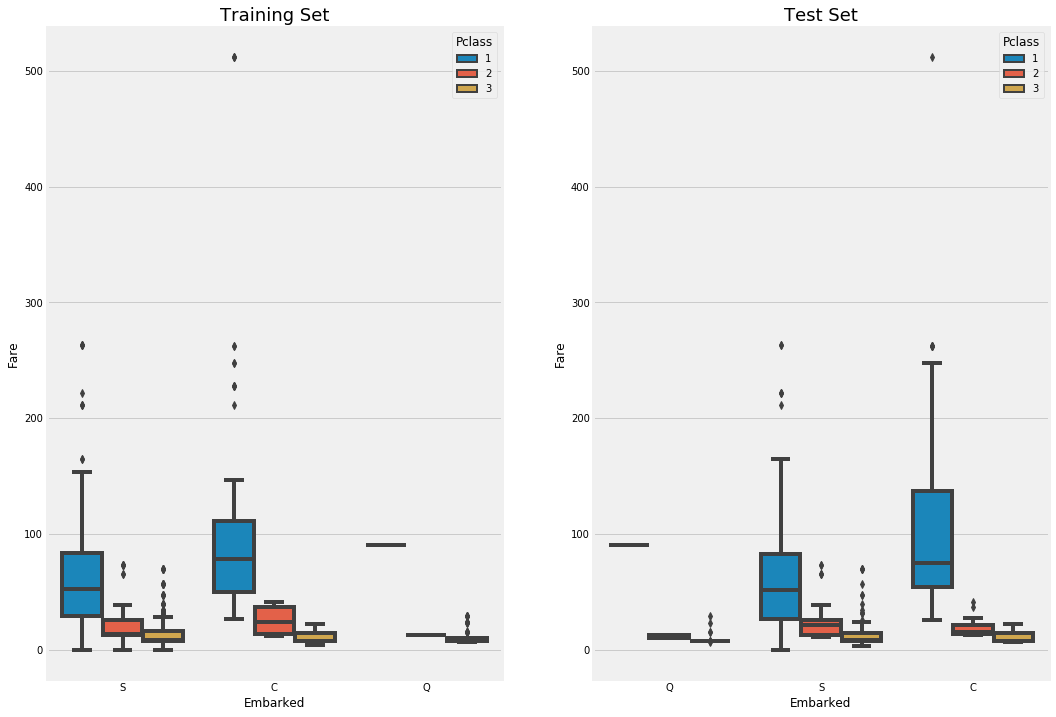

In [26]:
# We may be able to solve these two missing values by looking at other indepedent variables for our two observations
# As shown above both passengers paid a fare of $80, are of Pclass 1 and female
# Let's take a look at how Fare is distributed among all Pclass and Embarked features.

fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()

In [ ]:
# It looks like the average fare closest to $80 in Pclass 1 is in the C Embarked values
# Let's fill in the missing values as "C"
train.Embarked.fillna('C', inplace=True)

In [29]:
# Let's take a look at age which has about 20% missing values
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


A standard approach for dealing with null values would be imputing mean, median or mode. However, a large amount of age data is missing and we suspect it to be promising in deteremining survival rate, so we will use a Random Forest Regressor later in the Feature Engineering section to impute a missing value rather than simply select the mean, median or mode. We will leave the age column unchanged for now.

In [34]:
# Let's examine the cabin variable which has 77-78% missing values
print ("Train Cabin missing value: " + str((train.Cabin.isnull().sum()/len(train))*100)+str("%"))
print ("Test Cabin missing value: " + str((test.Cabin.isnull().sum()/len(test))*100)+str("%"))

Train Cabin missing value: 77.10437710437711%
Test Cabin missing value: 78.22966507177034%


Because so many observations are missing the Cabin feature we could either get rid of the whole feature, or
we can brainstorm a little and find an appropriate way to put it to use.  For example, We may say passengers with cabin records had a higher socio-economic-status then others. We may also say passengers with cabin records were more likely to be taken into consideration when loading into the boat.

In [35]:
# Let's combine train and test data and for now we will assign all teh null values as "N"

# Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [36]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [37]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [38]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

In [39]:
# Apply cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

In [42]:
# getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

# PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

# Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

### Feature Engineering